### README

#### Prerequisite:
- Python 3

#### Library Used:
- skimage 0.17 or upper
- Matplotlib 3.3.1 or upper
- cv2 4.4.0 or upper
- numpy 1.19.1

### How To Run
- Cell > Run All

### Persiapan Lingkungan Laboratorium

- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 6` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 6` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

In [1]:
pip install numpy scikit-image matplotlib opencv-python gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.system('gdown https://drive.google.com/uc?id=18lLFKd60a9E7t-MYskuErGDePcbqzd34')
os.system('unzip Tugas\ Lab\ 6\ -\ Images.zip')

0

### 1. [50] Thresholding

Terdapat suatu gambar coins.png yang terdiri dari beberapa koin dengan warna yang berbeda-beda.

![coins.png](coins.png)

Tentukan berapa jumlah koin yang terdapat pada gambar tersebut dengan menggunakan beberapa metode thresholding:

##### a. [10] Simple Global Thresholding
(hint: gunakan library OpenCV: cv2.threshold(img,127,255,cv.THRESH_BINARY))

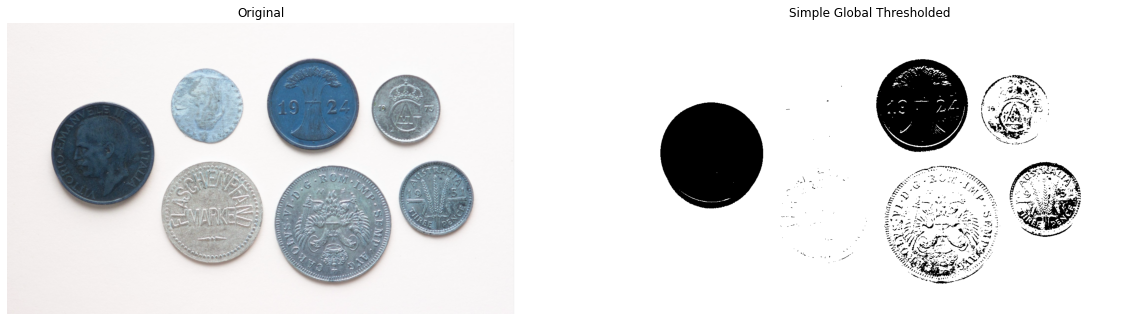

Berdasarkan metode Simple Global Thresholding, jumlah koin yang terdapat pada gambar berjumlah 5 koin


In [13]:
import cv2
from skimage import util, io, color
import matplotlib.pyplot as plt

coins = cv2.imread("coins.png")
coins_rgb = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
coins_grey = cv2.cvtColor(coins_rgb, cv2.COLOR_RGB2GRAY)

coins_simple = cv2.threshold(coins_grey,127,255,cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(coins)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(coins_simple[1], cmap='gray')
plt.title("Simple Global Thresholded"); plt.axis("off")
plt.show()

print('Berdasarkan metode Simple Global Thresholding, jumlah koin yang terdapat pada gambar berjumlah 5 koin')

##### b. [10] Otsu’s Thresholding (beserta histogramnya)

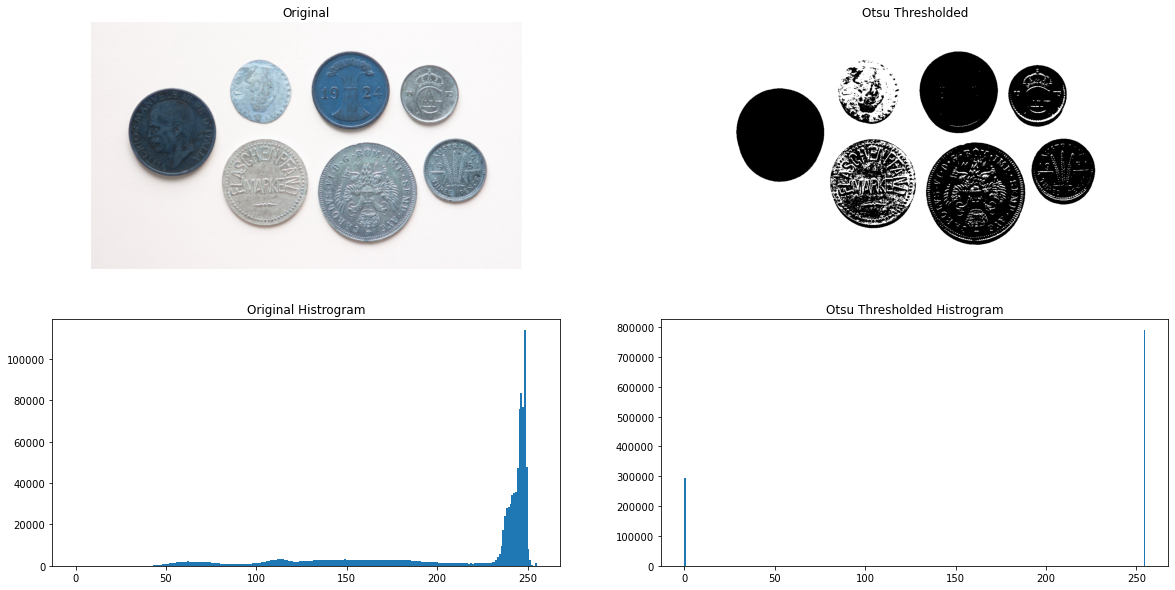

Berdasarkan metode Otsu Thresholding, jumlah koin yang terdapat pada gambar berjumlah 7 koin


In [12]:
from skimage import filters
import matplotlib.pyplot as plt

coins_otsu = cv2.threshold(coins_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1); plt.imshow(coins)
plt.title('Original'); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(coins_otsu[1], cmap='gray')
plt.title("Otsu Thresholded"); plt.axis("off")
plt.subplot(2,2,3); plt.hist(coins_grey.flatten(), 256, range=(0,255))
plt.title("Original Histrogram")
plt.subplot(2,2,4); plt.hist(coins_otsu[1].flatten(), 256, range=(0,255))
plt.title("Otsu Thresholded Histrogram")
plt.show()

print('Berdasarkan metode Otsu Thresholding, jumlah koin yang terdapat pada gambar berjumlah 7 koin')

##### c. [13] Jelaskan perbedaan hasil dari simple global thresholding dan Otsu’s thresholding dan alasan mengapa perbedaan tersebut bisa terjadi.

Pada global thresholding, hanya 5 koin yang nampak pada gambar, sedangkan pada otsu's thresholding nampak 7 koin. Hal ini terjadi karena nilai threshold yang berbeda. Nilai threshold pada global thresholding adalah 127, sedangkan nilai threshold dari otsu thresholding adalah 183

##### d. [13] Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?

Berdasarkan hasil 1.a dan 1.b, hasil yang lebih optimal untuk citra ini adalah hasil dari otsu thresholding yang dapat lebih banyak mendeteksi koin. Hal ini karena terdapat koin yang memiliki nilai intensitas diatas Global Thresholding sehingga koin tersebut tidak terdeteksi. Sedangkan dengan Otsu Thresholding, semua koin berada di bawah nilai ambang batasnya sehingga semua koin dapat terdeteksi

##### e. [4] Berapa jumlah koin yang terdapat pada citra?

7 Koin

### 2. [50] Clustering

Diberikan sebuah citra jembatan.jpg

![jembatan.jpg](jembatan.jpg)

##### a. [25] Gunakan algoritma SLIC untuk melakukan segmentasi, lakukan percobaan untuk 10, 50, dan 100 segmen.

In [5]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import numpy as np

bridge = io.imread("jembatan.jpg")

SLIC number of segments: 6


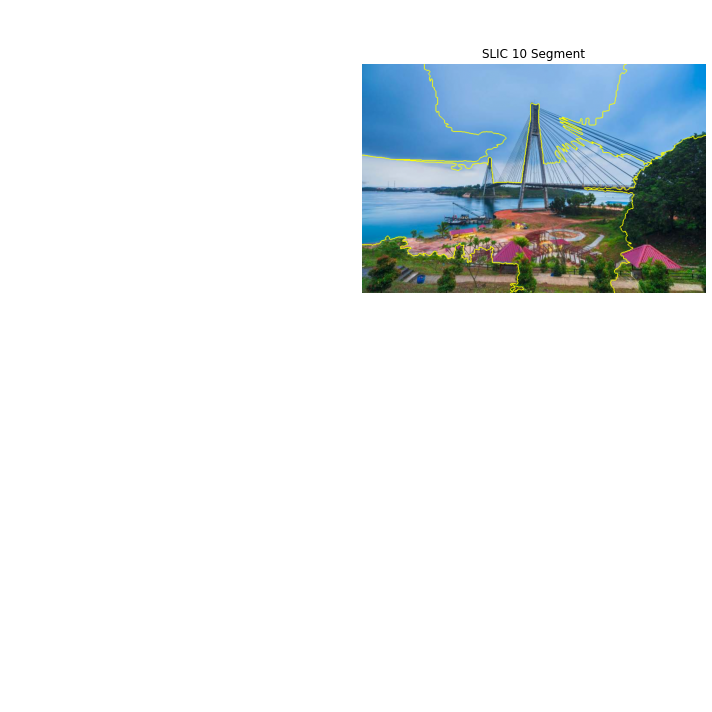

In [6]:
#10 Segmen
segments_slic_10 = slic(bridge, n_segments=10, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_10))}")
fig_10, ax_10 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax_10[0, 1].imshow(mark_boundaries(bridge, segments_slic_10))
ax_10[0, 1].set_title('SLIC 10 Segment')

for a in ax_10.ravel():
    a.set_axis_off()
    
plt.tight_layout()
plt.show()

SLIC number of segments: 34


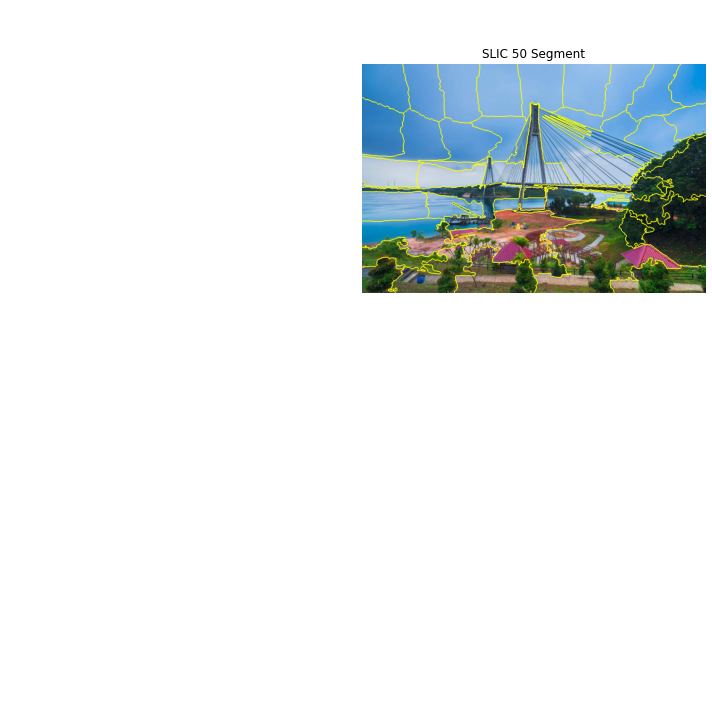

In [7]:
#50 Segmen
segments_slic_50 = slic(bridge, n_segments=50, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_50))}")
fig_50, ax_50 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax_50[0, 1].imshow(mark_boundaries(bridge, segments_slic_50))
ax_50[0, 1].set_title('SLIC 50 Segment')

for a in ax_50.ravel():
    a.set_axis_off()
    
plt.tight_layout()
plt.show()

SLIC number of segments: 68


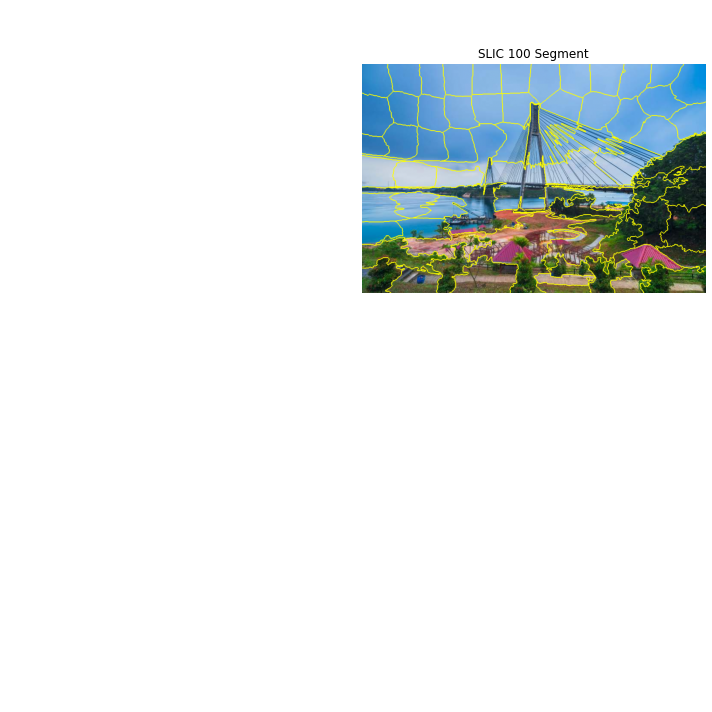

In [8]:
#100 Segmen
segments_slic_100 = slic(bridge, n_segments=100, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_100))}")
fig_100, ax_100 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax_100[0, 1].imshow(mark_boundaries(bridge, segments_slic_100))
ax_100[0, 1].set_title('SLIC 100 Segment')

for a in ax_100.ravel():
    a.set_axis_off()
    
plt.tight_layout()
plt.show()

##### b. [10] Apa yang dapat disimpulkan dari percobaan berbagai jumlah segmen. Jumlah segmen berapa yang menurut Anda paling baik? berikan penjelasannya.

Dari ketiga jumlah segmen yang dicoba, segmen dengan jumlah 100 memiliki hasil yang paling baik. Hal ini karena jumlah segmen menggambarkan jumlah superpiksel yang dihasilkan. Oleh karena itu, semakin banyak superpiksel, maka hasil akan semakin baik.

##### c. [15] Setelah memilih jumlah segmen yang paling baik pada soal 2.b, visualisasikan citra dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [9]:
def superpixel_median_image(image, slic_labels):
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
        
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

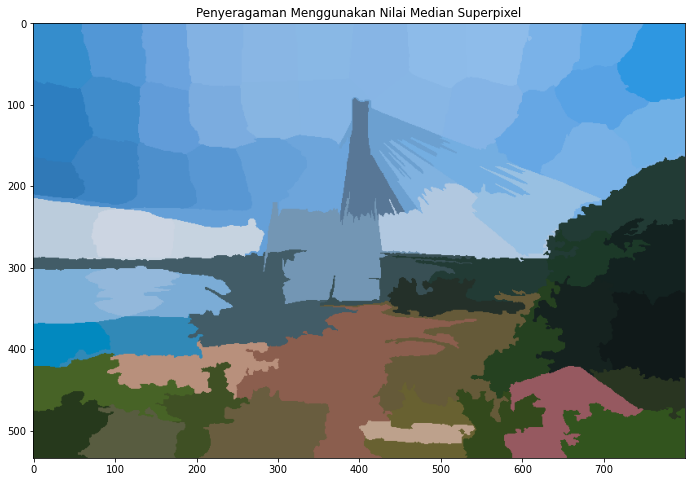

In [19]:
superpixel_image = superpixel_median_image(bridge, segments_slic_100)
plt.figure(figsize=(15, 8))
plt.title('Penyeragaman Menggunakan Nilai Median Superpixel')
plt.imshow(superpixel_image)
plt.show()